<a href="https://colab.research.google.com/github/anya765/climate-evidence-synthesis-nlp/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

if os.path.exists("/content/"):
    from google.colab import drive
    import os
    drive.mount('/content/drive')
    os.chdir("/content/drive/MyDrive/climate-science")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labelled_data = pd.read_csv("data/labelled_data.csv")

#create a lower case version of the title without spaces and punctuation, to allow for merging
labelled_data["title_lcase"] = labelled_data["title"].apply(
    lambda x: re.sub("\W", "", x).lower()
)
#get rid of documents without abstracts, as we can't use these for learning
labelled_data = labelled_data.dropna(subset=["abstract"])
print(labelled_data.shape)
labelled_data.head()

(2500, 11)


,id,abstract,title,seen,INCLUDE,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES,title_lcase
0,1448689,"The city of Bismarck, North Dakota has one of ...",Key Factors Influencing the Incidence of West ...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,keyfactorsinfluencingtheincidenceofwestnilevir...
1,3281128,Changing precipitation regimes can profoundly ...,Asymmetric responses of plant community struct...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,asymmetricresponsesofplantcommunitystructurean...
2,900708,Climate influences forest structure through ef...,Climate effects on fire regimes and tree recru...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,climateeffectsonfireregimesandtreerecruitmenti...
3,3234419,"Climate change is likely to bring more, hotter...",Climate change adaptation and mitigation ? a h...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,climatechangeadaptationandmitigationahitherton...
4,2090028,Aim The long-term stability of coastal ecosyst...,Caribbean mangroves adjust to rising sea level...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,caribbeanmangrovesadjusttorisingsealevelthroug...


In [ ]:
#load the Open alex data, and create the same title variable for merging

oa_data = pd.read_csv("data/openalex_data.csv").rename(columns={"id": "OA_id"})
oa_data["title_lcase"] = oa_data["title"].apply(lambda x: re.sub("\W", "", str(x)).lower())
oa_data = oa_data.dropna(subset=["abstract"])
oa_data["seen"] = 0
print(oa_data.shape)
oa_data.head()

(18291, 8)


,OA_id,doi,title,publication_year,abstract,authors,title_lcase,seen
0,https://openalex.org/W2076977109,https://doi.org/10.1038/nature03906,Increasing destructiveness of tropical cyclone...,2005,Theory and modelling predict that hurricane in...,Kerry Emanuel,increasingdestructivenessoftropicalcyclonesove...,0
1,https://openalex.org/W2171979944,https://doi.org/10.1007/s00425-003-1105-5,"Plant responses to drought, salinity and extre...",2003,"Abiotic stresses, such as drought, salinity, e...","Wangxia Wang, Basia Vinocur, Arie Altman",plantresponsestodroughtsalinityandextremetempe...,0
2,https://openalex.org/W2122582889,https://doi.org/10.1073/pnas.0505734102,Regional vegetation die-off in response to glo...,2005,Future drought is projected to occur under war...,"David D. Breshears, Neil S. Cobb, Paul M. Rich...",regionalvegetationdieoffinresponsetoglobalchan...,0
3,https://openalex.org/W2161828152,https://doi.org/10.1073/pnas.0901438106,Temperature sensitivity of drought-induced tre...,2009,Large-scale biogeographical shifts in vegetati...,"Henry D. Adams, Maite Guardiola-Claramonte, Gr...",temperaturesensitivityofdroughtinducedtreemort...,0
4,https://openalex.org/W2154180993,https://doi.org/10.1038/nature04188,Impact of regional climate change on human health,2005,The World Health Organisation estimates that t...,"Jonathan A. Patz, Diarmid Campbell-Lendrum, Tr...",impactofregionalclimatechangeonhumanhealth,0


In [ ]:
#add the OpenAlex rows which are not in the labelled data to the labelled_data
df = pd.concat(
    [labelled_data, oa_data[~oa_data["title_lcase"].isin(labelled_data["title_lcase"])]]
)
print(df.shape)
df.head()

(20465, 15)


,id,abstract,title,seen,INCLUDE,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES,title_lcase,OA_id,doi,publication_year,authors
0,1448689.0,"The city of Bismarck, North Dakota has one of ...",Key Factors Influencing the Incidence of West ...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,keyfactorsinfluencingtheincidenceofwestnilevir...,NaN,NaN,NaN,NaN
1,3281128.0,Changing precipitation regimes can profoundly ...,Asymmetric responses of plant community struct...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,asymmetricresponsesofplantcommunitystructurean...,NaN,NaN,NaN,NaN
2,900708.0,Climate influences forest structure through ef...,Climate effects on fire regimes and tree recru...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,climateeffectsonfireregimesandtreerecruitmenti...,NaN,NaN,NaN,NaN
3,3234419.0,"Climate change is likely to bring more, hotter...",Climate change adaptation and mitigation ? a h...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,climatechangeadaptationandmitigationahitherton...,NaN,NaN,NaN,NaN
4,2090028.0,Aim The long-term stability of coastal ecosyst...,Caribbean mangroves adjust to rising sea level...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,caribbeanmangrovesadjusttorisingsealevelthroug...,NaN,NaN,NaN,NaN


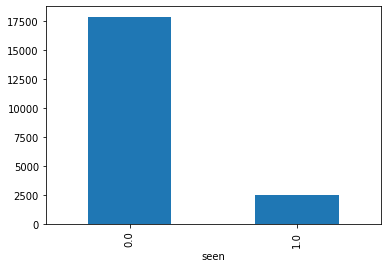

In [ ]:
df.groupby("seen")["title"].count().plot.bar();

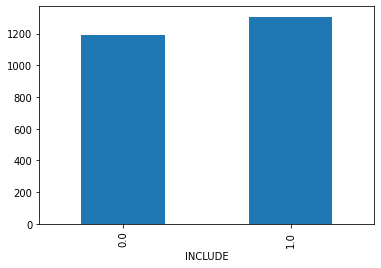

In [ ]:
df.groupby("INCLUDE")["title"].count().plot.bar();

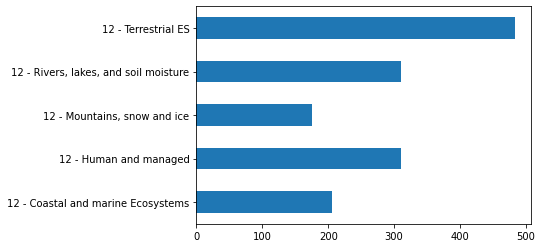

In [ ]:
impacts = [x for x in df.columns if re.match("12 -", x)]
df[impacts].sum().plot.barh();

Machine learning model

In [ ]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Let's take for now a couple of example texts
texts = [
    "Climate change is bad",
    "Climate action is needed",
    "Climate change needs to be fixed",
]

# We'll instantiate a vectorizer class
vectorizer = CountVectorizer()

# And apply the fit_transform method to our texts
X = vectorizer.fit_transform(texts)

# This gives us a matrix of shape n_texts, vocab_size
X.todense()

matrix([[0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0, 1, 1]])

[[0 1 0 1 1 0 1 0 0 0]
 [1 0 0 0 1 0 1 1 0 0]
 [0 0 1 1 1 1 0 0 1 1]]


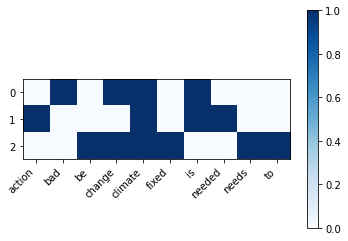

In [ ]:
# The features each column represents can be accessed here
features = vectorizer.get_feature_names_out()


def visualize_doc_vec(X, features=None):
    print(X.todense())
    # And we could visualise this simply like this
    fig, ax = plt.subplots()
    doc_map = ax.imshow(X.todense(), cmap="Blues")
    ax.set_xticks(np.arange(len(features)))
    ax.set_xticklabels(features, rotation=45, ha="right")
    cbar = fig.colorbar(doc_map)


visualize_doc_vec(X, features)

plt.show()

[[0.         0.63174505 0.         0.4804584  0.37311881 0.
  0.4804584  0.         0.         0.        ]
 [0.5844829  0.         0.         0.         0.34520502 0.
  0.44451431 0.5844829  0.         0.        ]
 [0.         0.         0.45050407 0.34261996 0.26607496 0.45050407
  0.         0.         0.45050407 0.45050407]]


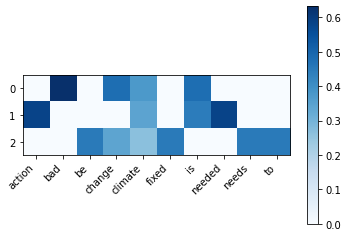

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

features = vectorizer.get_feature_names_out()

visualize_doc_vec(X, features)

plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

clf = Pipeline(
    steps=[
        ("vect", TfidfVectorizer()),
        ("clf", SVC(probability=True, class_weight="balanced")),
    ]
)

# We'll slightly expand our list of texts
texts, y = zip(
    *[
        ("Climate change is impacting human systems", 1),
        ("Climate change is caused by fossil fuels", 0),
        ("Agricultural yields are affected by climate change", 1),
        ("System change not climate change", 0),
        ("higher temperatures are impacting human health", 1),
        ("Forest fires are becoming more frequent due to climate change", 1),
        ("Machine learning can read texts", 0),
        ("AI can help solve climate change!", 0),
        ("We need to save gas this winter", 0),
        ("More frequent droughts are impacting crop yields", 1),
        ("Many communities are affected by rising sea levels", 1),
        ("Global emissions continue to rise", 0),
        ("Ecosystems are increasingly impacted by rising temperatures", 1),
        ("Emissions from fossil fuels need to decline", 0),
        ("Anthropogenic climate change is impacting vulnerable communities", 1),
    ]
)

clf.fit(texts, y)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', SVC(class_weight='balanced', probability=True))])

In [ ]:
new_texts = [
    "climate change is impacting terrestrial ecosystems",
    "Machine Learning will solve climate change",
    "Fossil fuels are responsible for rising temperature",
]
# We can make predictions about which class the examples belong to
clf.predict(new_texts)

array([1, 0, 0])

In [ ]:
clf.predict_proba(new_texts)

array([[0.5150745 , 0.4849255 ],
       [0.40359229, 0.59640771],
       [0.44818037, 0.55181963]])

Multilabel

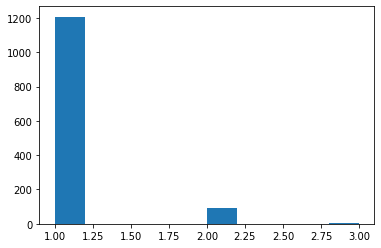

In [ ]:
plt.hist(df[df["INCLUDE"] == 1][impacts].sum(axis=1));

In [ ]:
samples = df[df["INCLUDE"] == 1].sample(200).index
X = df.iloc[samples]["abstract"]
y = df.iloc[samples][impacts].values
np.set_printoptions(threshold=5)
y

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

clf = Pipeline(
    steps=[
        ("vec", TfidfVectorizer()),
        ("clf", OneVsRestClassifier(SVC(probability=True, class_weight="balanced"))),
    ]
)

clf.fit(X, y)

Pipeline(steps=[('vec', TfidfVectorizer()),
                ('clf',
                 OneVsRestClassifier(estimator=SVC(class_weight='balanced',
                                                   probability=True)))])

In [ ]:
example_texts = [
    "Climate change has affected butterfly phenology in North America. "
    + "In an experiment in the butterfly national park, we found that "
    + "mean dates of appearance had shifted by two weeks. Species traits, "
    + "especially ecological traits, were found to explain some part of "
    + "different phenological responses",
    "Rising temperatures have contributed to increasing heat related mortaility "
    + "in cities across Europe. ",
]
y_pred = clf.predict(example_texts)

pd.DataFrame(y_pred, columns=impacts)

,12 - Coastal and marine Ecosystems,12 - Human and managed,"12 - Mountains, snow and ice","12 - Rivers, lakes, and soil moisture",12 - Terrestrial ES
0,0,0,0,0,1
1,0,0,0,0,0


Transfer Learning with transformers

In [ ]:
texts, y = zip(
    *[
        ("Climate change is impacting human systems", 1),
        ("Climate change is caused by fossil fuels", 0),
        ("Agricultural yields are affected by climate change", 1),
        ("System change not climate change", 0),
        ("higher temperatures are impacting human health", 1),
        ("Forest fires are becoming more frequent due to climate change", 1),
        ("Machine learning can read texts", 0),
        ("AI can help solve climate change!", 0),
        ("We need to save gas this winter", 0),
        ("More frequent droughts are impacting crop yields", 1),
        ("Many communities are affected by rising sea levels", 1),
        ("Global emissions continue to rise", 0),
        ("Ecosystems are increasingly impacted by rising temperatures", 1),
        ("Emissions from fossil fuels need to decline", 0),
        ("Anthropogenic climate change is impacting vulnerable communities", 1),
    ]
)

In [ ]:
!pip install transformers
!pip install datasets
from datasets import Dataset
from transformers import AutoTokenizer

# First we'll put them into a HuggingFace Dataset object
dataset = Dataset.from_dict({"text": texts, "label": y})

# And now we need to tokenize the texts, using the pretrained tokenizer from climatebert
model_name = "climatebert/distilroberta-base-climate-f"
tokenizer = AutoTokenizer.from_pretrained(model_name)


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="longest", truncation=True)


tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset[0]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 8.0 MB/s 
     |████████████████████████████████| 7.6 MB 45.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.15M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

{'text': 'Climate change is impacting human systems',
 'label': 1,
 'input_ids': [0,
  40466,
  464,
  16,
  18081,
  1050,
  1437,
  50278,
  2,
  1,
  1,
  1,
  1,
  1,
  1],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]}

In [ ]:
def datasetify(x, tokenizer, y=None):
    data_dict = {"text": x}
    if y is not None:
        data_dict["label"] = y
    dataset = Dataset.from_dict(data_dict)

    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="longest", truncation=True)

    return dataset.map(tokenize_function, batched=True)


tokenized_dataset = datasetify(texts, tokenizer, y)
tokenized_dataset[0]

  0%|          | 0/1 [00:00<?, ?ba/s]

{'text': 'Climate change is impacting human systems',
 'label': 1,
 'input_ids': [0,
  40466,
  464,
  16,
  18081,
  1050,
  1437,
  50278,
  2,
  1,
  1,
  1,
  1,
  1,
  1],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]}

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, logging

logging.set_verbosity_warning()

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
trainer = Trainer(model=model, train_dataset=datasetify(texts, tokenizer, y))
trainer.train()

Downloading:   0%|          | 0.00/752 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Some weights of the model checkpoint at climatebert/distilroberta-base-climate-f were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 15
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 6
  Number of trainable parameters = 82300418


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=6, training_loss=0.6554670333862305, metrics={'train_runtime': 13.1004, 'train_samples_per_second': 3.435, 'train_steps_per_second': 0.458, 'total_flos': 174639636900.0, 'train_loss': 0.6554670333862305, 'epoch': 3.0})

In [ ]:
new_texts = [
    "climate change is impacting terrestrial ecosystems",
    "Machine Learning will solve climate change",
    "Fossil fuels are responsible for rising temperature",
]


pred = trainer.predict(datasetify(new_texts, tokenizer, [1, 0, 0]))
pred

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3
  Batch size = 8


PredictionOutput(predictions=array([[-0.12838948,  0.04461829],
       [-0.04902578, -0.0193814 ],
       [-0.06614725, -0.02002714]], dtype=float32), label_ids=array([1, 0, 0]), metrics={'test_loss': 0.6783108115196228, 'test_runtime': 0.1213, 'test_samples_per_second': 24.737, 'test_steps_per_second': 8.246})

In [ ]:
from torch import tensor
from torch.nn import Sigmoid, Softmax

activation = (
    Softmax()
)  # Since we have two exclusive classes, we use the Softmax function
activation(tensor(pred.predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


tensor([[0.4569, 0.5431],
        [0.4926, 0.5074],
        [0.4885, 0.5115]])

In [ ]:
from transformers.trainer_utils import PredictionOutput


class ProbTrainer(Trainer):
    def predict_proba(self, test_dataset: Dataset) -> PredictionOutput:
        logits = self.predict(test_dataset).predictions
        if logits.shape[1] > 2:
            activation = Sigmoid()
        else:
            activation = Softmax()
        return activation(tensor(logits)).numpy()


trainer = ProbTrainer(model=model, train_dataset=datasetify(texts, tokenizer, y))
trainer.train()

pred = trainer.predict_proba(datasetify(new_texts, tokenizer))
pred

  0%|          | 0/1 [00:00<?, ?ba/s]

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 15
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 6
  Number of trainable parameters = 82300418


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3
  Batch size = 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


array([[0.25941947, 0.74058056],
       [0.5595577 , 0.4404423 ],
       [0.5832309 , 0.41676912]], dtype=float32)

In [ ]:
samples = df[df["INCLUDE"] == 1].sample(5).index
X = df.iloc[samples]["abstract"]
y = df.iloc[samples][impacts].values
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)
trainer = ProbTrainer(model=model, train_dataset=datasetify(X, tokenizer, y))
trainer.train()

pred = trainer.predict_proba(datasetify(new_texts, tokenizer))
pred

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--climatebert--distilroberta-base-climate-f/snapshots/d04f8afaceb89c882a110ada795bf580627c13c4/config.json
Model config RobertaConfig {
  "_name_or_path": "climatebert/distilroberta-base-climate-f",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_to

  0%|          | 0/1 [00:00<?, ?ba/s]

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 5
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3
  Number of trainable parameters = 82302725


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3
  Batch size = 8


array([[0.4432333 , 0.50979346, 0.50362444, 0.5321897 , 0.5029182 ],
       [0.44395107, 0.509708  , 0.50338215, 0.53259814, 0.5044657 ],
       [0.44135088, 0.5071045 , 0.5026319 , 0.5318376 , 0.5061048 ]],
      dtype=float32)